In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [15]:
# Load the dataset
df = pd.read_csv('Balaji Fast Food Sales.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())


Dataset Shape: (1000, 10)

First 5 rows:
   order_id        date        item_name  item_type  item_price  quantity  \
0         1  07-03-2022         Aalopuri   Fastfood          20        13   
1         2   8/23/2022          Vadapav   Fastfood          20        15   
2         3  11/20/2022          Vadapav   Fastfood          20         1   
3         4  02-03-2023  Sugarcane juice  Beverages          25         6   
4         5  10-02-2022  Sugarcane juice  Beverages          25         8   

   transaction_amount transaction_type received_by time_of_sale  
0                 260              NaN         Mr.        Night  
1                 300             Cash         Mr.    Afternoon  
2                  20             Cash         Mr.    Afternoon  
3                 150           Online         Mr.        Night  
4                 200           Online         Mr.      Evening  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns

In [16]:
# Data Cleaning and Preprocessing

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Fill missing transaction_type with 'Unknown'
df['transaction_type'].fillna('Unknown', inplace=True)

# Convert date column to datetime
def parse_date(date_str):
    try:
        # Try MM-DD-YYYY format first
        return pd.to_datetime(date_str, format='%m-%d-%Y')
    except:
        try:
            # Try M/D/YYYY format
            return pd.to_datetime(date_str, format='%m/%d/%Y')
        except:
            # If both fail, use pandas default parser
            return pd.to_datetime(date_str)

df['date'] = df['date'].apply(parse_date)

# Extract additional date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['month_name'] = df['date'].dt.month_name()

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

print("\nData cleaning completed!")
print(f"Dataset shape after cleaning: {df.shape}")


Missing values in each column:
order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

Duplicate rows: 0

Data cleaning completed!
Dataset shape after cleaning: (1000, 14)


In [17]:
# Exploratory Data Analysis

# Basic statistics
print("Dataset Overview:")
print(f"Total Orders: {len(df)}")
print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"Total Revenue: ₹{df['transaction_amount'].sum():,}")
print(f"Average Order Value: ₹{df['transaction_amount'].mean():.2f}")
print(f"Average Quantity per Order: {df['quantity'].mean():.2f}")

print("\nUnique Values:")
print(f"Items: {df['item_name'].nunique()}")
print(f"Item Types: {df['item_type'].nunique()}")
print(f"Customers: {df['received_by'].nunique()}")
print(f"Time Periods: {df['time_of_sale'].nunique()}")


Dataset Overview:
Total Orders: 1000
Date Range: 2022-04-01 00:00:00 to 2023-03-30 00:00:00
Total Revenue: ₹275,230
Average Order Value: ₹275.23
Average Quantity per Order: 8.16

Unique Values:
Items: 7
Item Types: 2
Customers: 2
Time Periods: 5


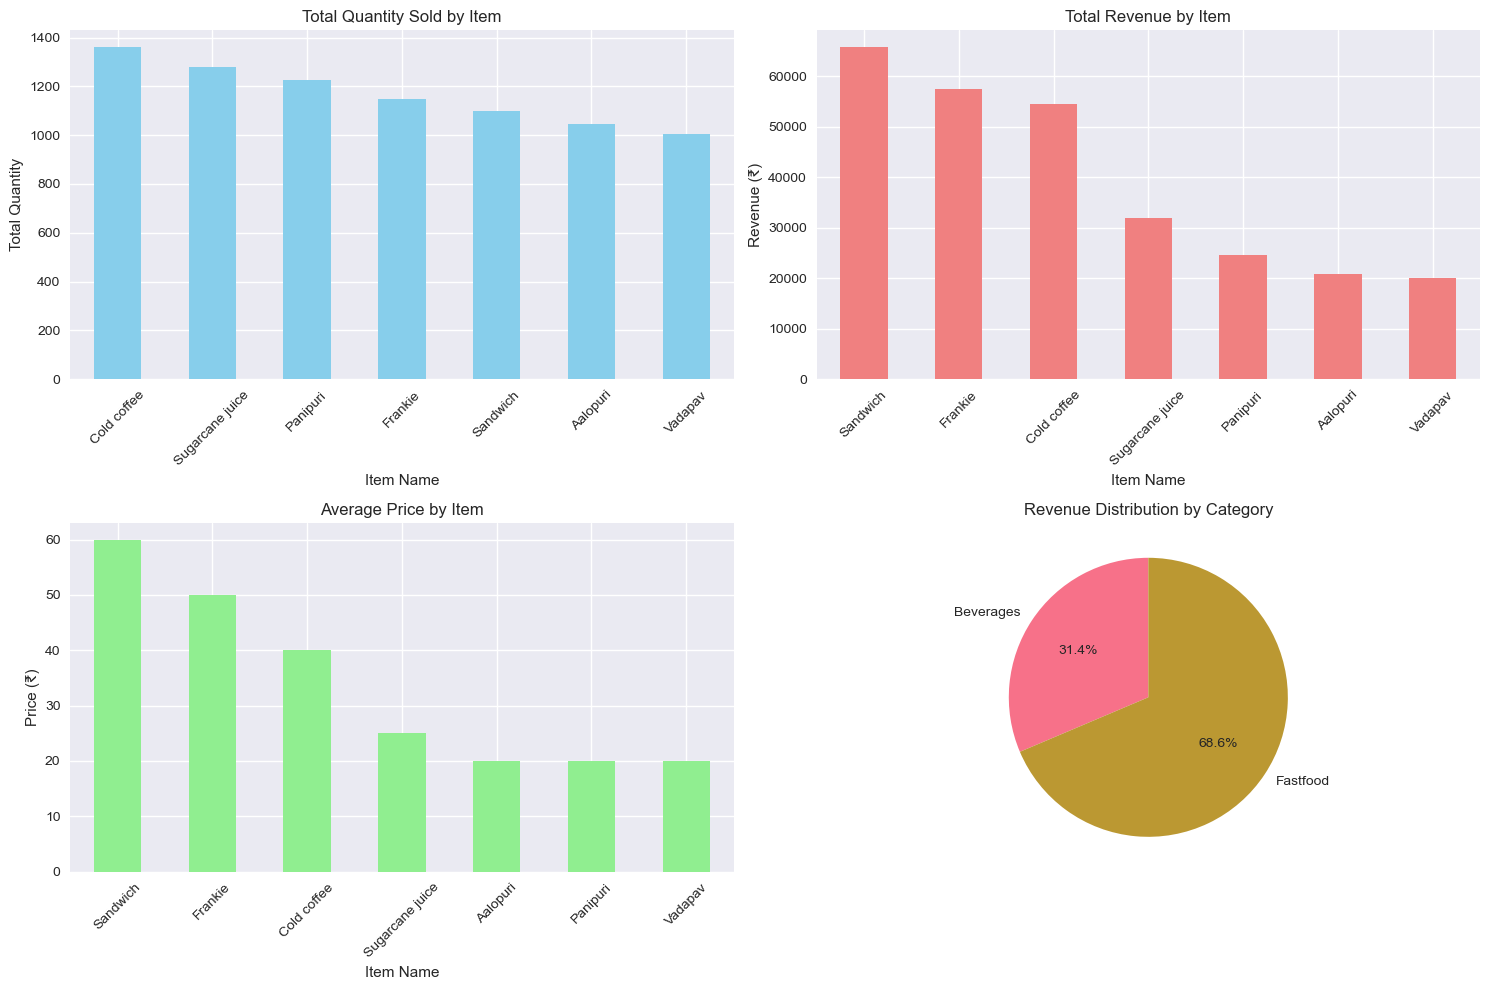

In [18]:
# Sales Analysis by Product

# Top selling items by quantity
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
item_sales = df.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
item_sales.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold by Item')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)

# Revenue by item
plt.subplot(2, 2, 2)
item_revenue = df.groupby('item_name')['transaction_amount'].sum().sort_values(ascending=False)
item_revenue.plot(kind='bar', color='lightcoral')
plt.title('Total Revenue by Item')
plt.xlabel('Item Name')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)

# Average price per item
plt.subplot(2, 2, 3)
avg_price = df.groupby('item_name')['item_price'].mean().sort_values(ascending=False)
avg_price.plot(kind='bar', color='lightgreen')
plt.title('Average Price by Item')
plt.xlabel('Item Name')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)

# Sales by category
plt.subplot(2, 2, 4)
category_sales = df.groupby('item_type')['transaction_amount'].sum()
plt.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Distribution by Category')

plt.tight_layout()
plt.show()


=== CUSTOMER BEHAVIOR ANALYSIS ===

Customer Distribution:
received_by
Mr.     512
Mrs.    488
Name: count, dtype: int64

Revenue Analysis by Gender:
            transaction_amount               quantity      
                           sum    mean count      sum  mean
received_by                                                
Mr.                     143440  280.16   512     4268  8.34
Mrs.                    131790  270.06   488     3894  7.98



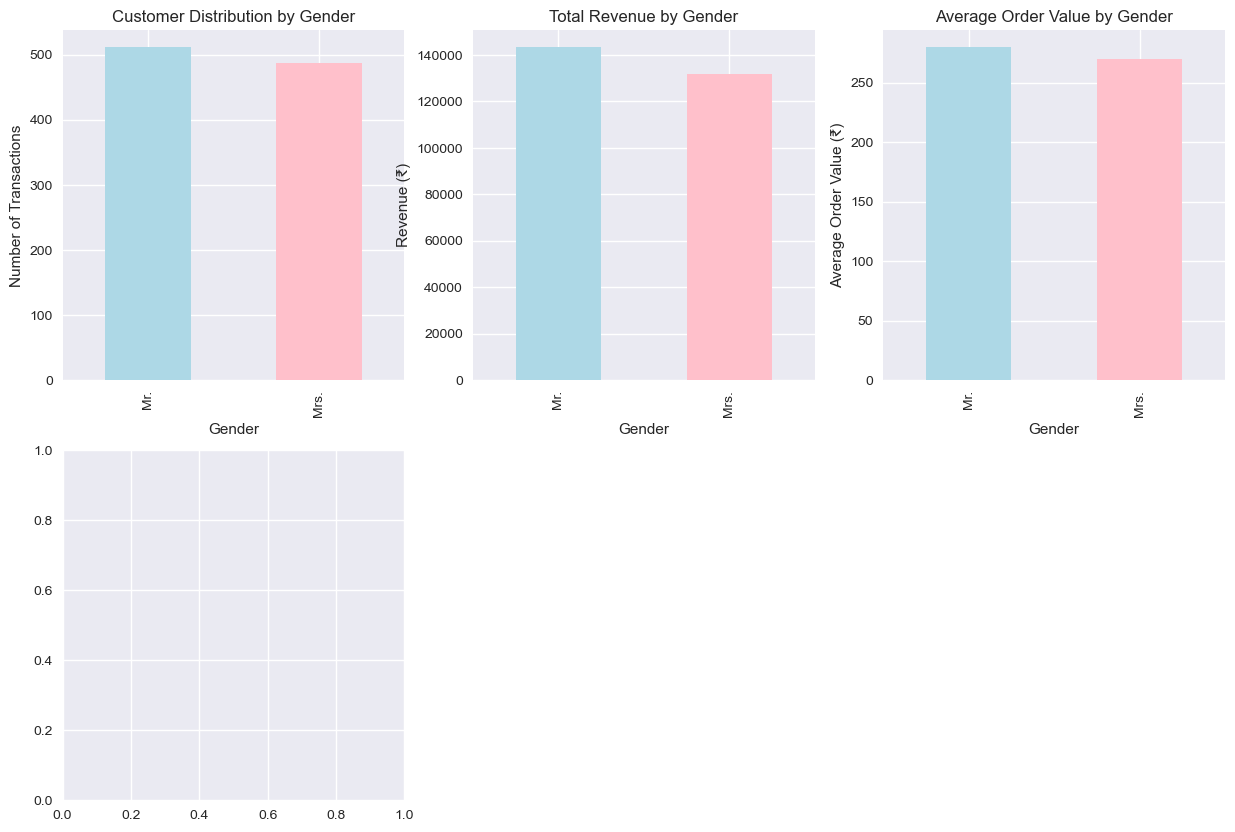

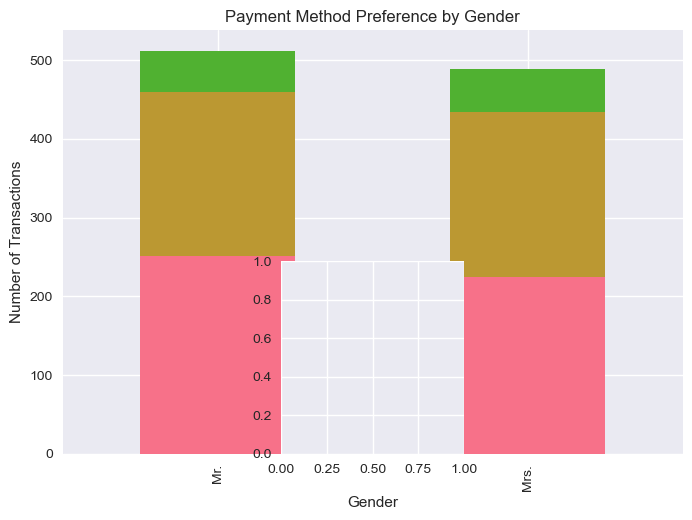

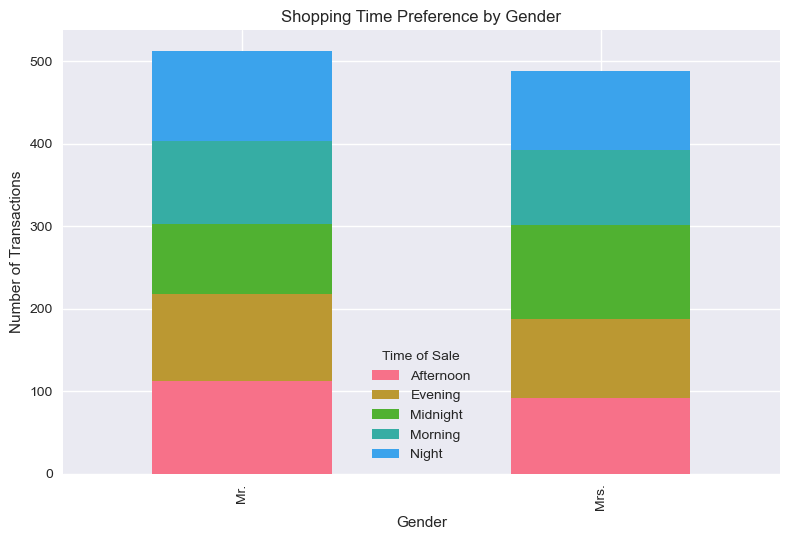

In [19]:
# Customer Behavior Analysis

# Gender-based analysis
print("=== CUSTOMER BEHAVIOR ANALYSIS ===\n")

# Customer distribution
customer_dist = df['received_by'].value_counts()
print("Customer Distribution:")
print(customer_dist)
print()

# Revenue by gender
gender_revenue = df.groupby('received_by').agg({
    'transaction_amount': ['sum', 'mean', 'count'],
    'quantity': ['sum', 'mean']
}).round(2)

print("Revenue Analysis by Gender:")
print(gender_revenue)
print()

# Visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
customer_dist.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')

plt.subplot(2, 3, 2)
gender_revenue_sum = df.groupby('received_by')['transaction_amount'].sum()
gender_revenue_sum.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Total Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Revenue (₹)')

plt.subplot(2, 3, 3)
gender_avg_order = df.groupby('received_by')['transaction_amount'].mean()
gender_avg_order.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Average Order Value by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Order Value (₹)')

# Payment preference by gender
plt.subplot(2, 3, 4)
payment_gender = pd.crosstab(df['received_by'], df['transaction_type'])
payment_gender.plot(kind='bar', stacked=True)
plt.title('Payment Method Preference by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Method')

# Time preference by gender
plt.subplot(2, 3, 5)
time_gender = pd.crosstab(df['received_by'], df['time_of_sale'])
time_gender.plot(kind='bar', stacked=True)
plt.title('Shopping Time Preference by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.legend(title='Time of Sale')

plt.tight_layout()
plt.show()


=== TIME-BASED ANALYSIS ===



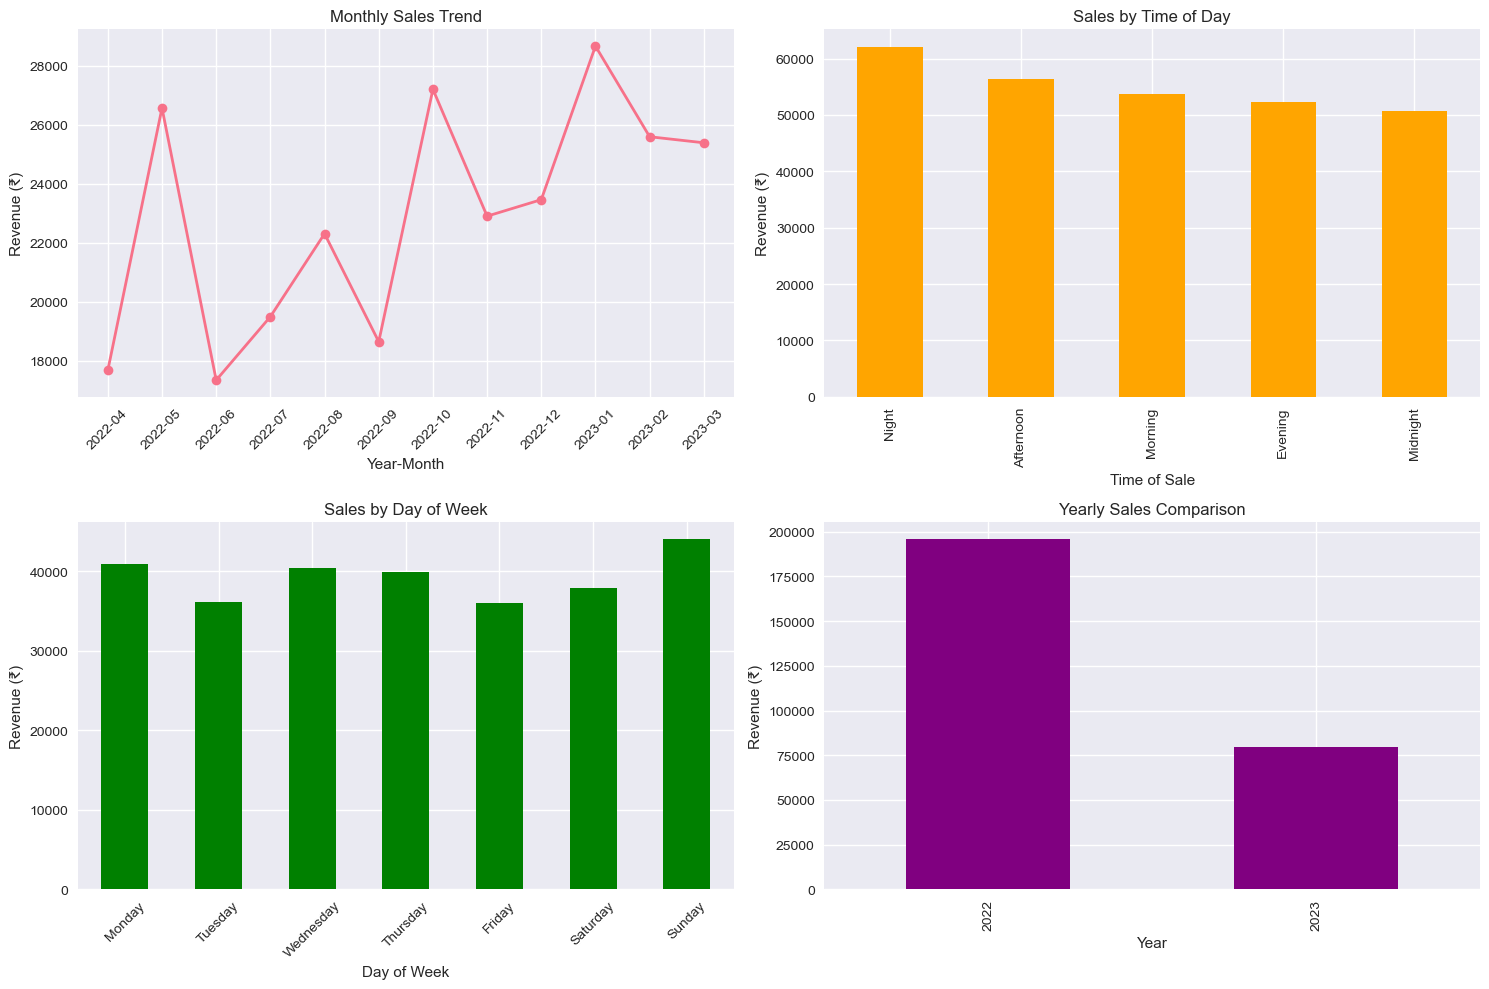

In [20]:
# Time-based Analysis

print("=== TIME-BASED ANALYSIS ===\n")

# Monthly sales trend
monthly_sales = df.groupby(['year', 'month'])['transaction_amount'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str).str.zfill(2)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(monthly_sales['year_month'], monthly_sales['transaction_amount'], marker='o', linewidth=2)
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)

# Sales by time of day
plt.subplot(2, 2, 2)
time_sales = df.groupby('time_of_sale')['transaction_amount'].sum().sort_values(ascending=False)
time_sales.plot(kind='bar', color='orange')
plt.title('Sales by Time of Day')
plt.xlabel('Time of Sale')
plt.ylabel('Revenue (₹)')

# Day of week analysis
plt.subplot(2, 2, 3)
dow_sales = df.groupby('day_of_week')['transaction_amount'].sum()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales = dow_sales.reindex(dow_order)
dow_sales.plot(kind='bar', color='green')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)

# Yearly comparison
plt.subplot(2, 2, 4)
yearly_sales = df.groupby('year')['transaction_amount'].sum()
yearly_sales.plot(kind='bar', color='purple')
plt.title('Yearly Sales Comparison')
plt.xlabel('Year')
plt.ylabel('Revenue (₹)')

plt.tight_layout()
plt.show()


=== PAYMENT METHOD ANALYSIS ===

Payment Method Analysis:
                 transaction_amount               quantity
                                sum    mean count      sum
transaction_type                                          
Cash                         132840  279.08   476     3943
Online                       110595  265.22   417     3291
Unknown                       31795  297.15   107      928



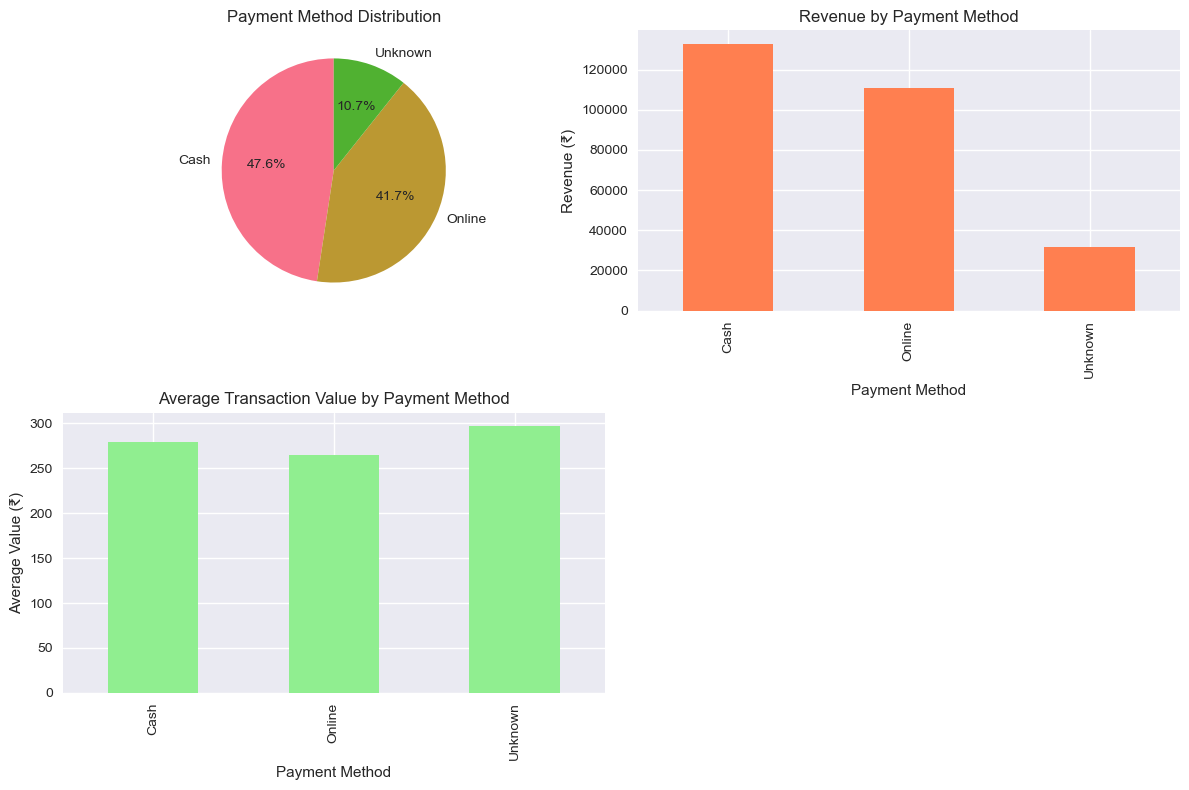

In [21]:
# Payment Method Analysis

print("=== PAYMENT METHOD ANALYSIS ===\n")

payment_analysis = df.groupby('transaction_type').agg({
    'transaction_amount': ['sum', 'mean', 'count'],
    'quantity': 'sum'
}).round(2)

print("Payment Method Analysis:")
print(payment_analysis)
print()

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
payment_dist = df['transaction_type'].value_counts()
plt.pie(payment_dist.values, labels=payment_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution')

plt.subplot(2, 2, 2)
payment_revenue = df.groupby('transaction_type')['transaction_amount'].sum()
payment_revenue.plot(kind='bar', color='coral')
plt.title('Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Revenue (₹)')

plt.subplot(2, 2, 3)
payment_avg = df.groupby('transaction_type')['transaction_amount'].mean()
payment_avg.plot(kind='bar', color='lightgreen')
plt.title('Average Transaction Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Value (₹)')

plt.tight_layout()
plt.show()


=== ADVANCED CUSTOMER INSIGHTS ===

Customer Behavior by Time and Gender:
                         transaction_amount       quantity
                                        sum count      sum
time_of_sale received_by                                  
Afternoon    Mr.                      31865   113      967
             Mrs.                     24480    92      747
Evening      Mr.                      28820   105      838
             Mrs.                     23535    96      702
Midnight     Mr.                      22305    85      698
             Mrs.                     28420   114      877
Morning      Mr.                      27670   100      822
             Mrs.                     26060    90      752
Night        Mr.                      32780   109      943
             Mrs.                     29295    96      816

Item Preference by Gender (Quantity):
received_by      Mr.  Mrs.
item_name                 
Aalopuri         583   461
Cold coffee      674   687
Frankie     

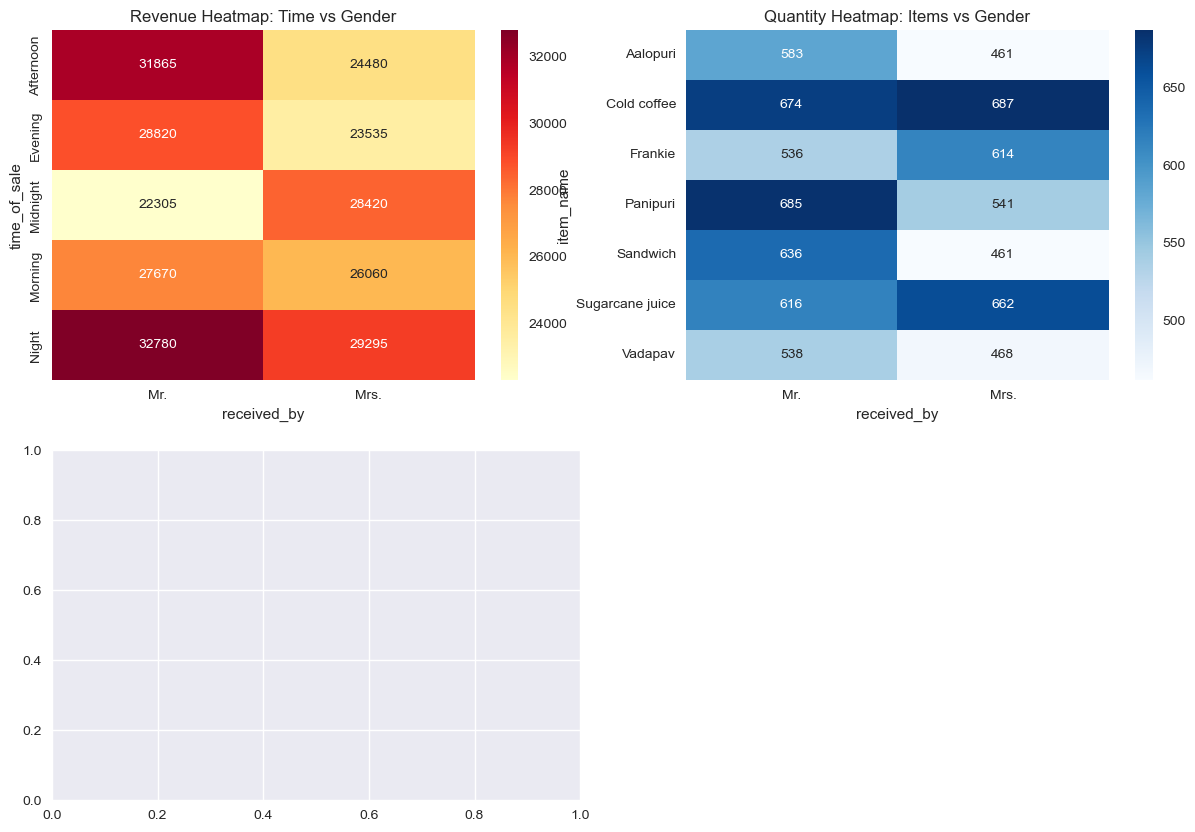

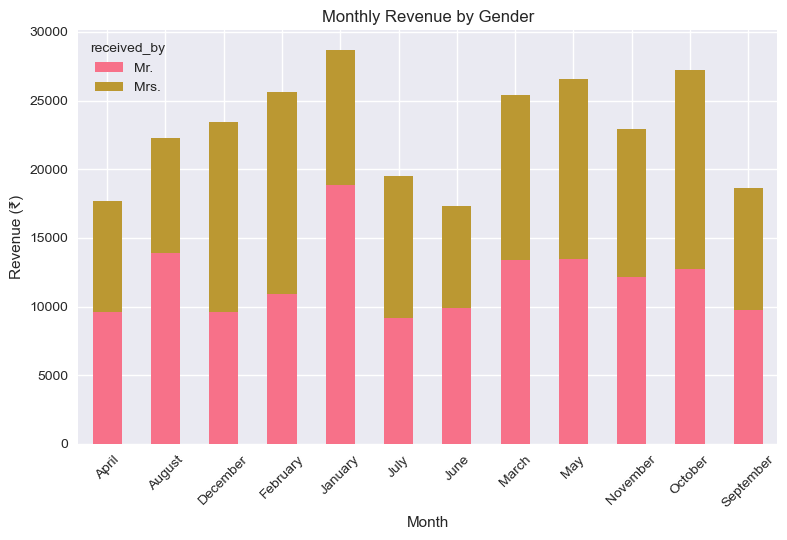

In [22]:
# Advanced Customer Insights

print("=== ADVANCED CUSTOMER INSIGHTS ===\n")

# Customer behavior by time and gender
time_gender_analysis = df.groupby(['time_of_sale', 'received_by']).agg({
    'transaction_amount': ['sum', 'count'],
    'quantity': 'sum'
}).round(2)

print("Customer Behavior by Time and Gender:")
print(time_gender_analysis)
print()

# Item preference by gender
item_gender = pd.crosstab(df['item_name'], df['received_by'], values=df['quantity'], aggfunc='sum')
print("Item Preference by Gender (Quantity):")
print(item_gender)
print()

# Heatmap of customer behavior
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
# Time vs Gender heatmap
time_gender_pivot = df.pivot_table(values='transaction_amount', 
                                   index='time_of_sale', 
                                   columns='received_by', 
                                   aggfunc='sum')
sns.heatmap(time_gender_pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Revenue Heatmap: Time vs Gender')

plt.subplot(2, 2, 2)
# Item vs Gender heatmap
item_gender_pivot = df.pivot_table(values='quantity', 
                                   index='item_name', 
                                   columns='received_by', 
                                   aggfunc='sum')
sns.heatmap(item_gender_pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Quantity Heatmap: Items vs Gender')

plt.subplot(2, 2, 3)
# Monthly trend by gender
monthly_gender = df.groupby(['month_name', 'received_by'])['transaction_amount'].sum().unstack()
monthly_gender.plot(kind='bar', stacked=True)
plt.title('Monthly Revenue by Gender')
plt.xlabel('Month')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [23]:
# Key Performance Indicators (KPIs)

print("=== KEY PERFORMANCE INDICATORS ===\n")

# Calculate KPIs
total_revenue = df['transaction_amount'].sum()
total_orders = len(df)
avg_order_value = df['transaction_amount'].mean()
total_quantity = df['quantity'].sum()
avg_quantity_per_order = df['quantity'].mean()

# Best performing metrics
best_selling_item = df.groupby('item_name')['quantity'].sum().idxmax()
highest_revenue_item = df.groupby('item_name')['transaction_amount'].sum().idxmax()
best_customer_segment = df['received_by'].value_counts().idxmax()
peak_sales_time = df.groupby('time_of_sale')['transaction_amount'].sum().idxmax()

print(f"📊 BUSINESS PERFORMANCE SUMMARY")
print(f"{'='*50}")
print(f"Total Revenue: ₹{total_revenue:,}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: ₹{avg_order_value:.2f}")
print(f"Total Items Sold: {total_quantity:,}")
print(f"Average Items per Order: {avg_quantity_per_order:.2f}")
print()
print(f"🏆 TOP PERFORMERS")
print(f"{'='*50}")
print(f"Best Selling Item: {best_selling_item}")
print(f"Highest Revenue Item: {highest_revenue_item}")
print(f"Primary Customer Segment: {best_customer_segment}")
print(f"Peak Sales Time: {peak_sales_time}")
print()

# Revenue breakdown
print(f"💰 REVENUE BREAKDOWN")
print(f"{'='*50}")
for item_type in df['item_type'].unique():
    type_revenue = df[df['item_type'] == item_type]['transaction_amount'].sum()
    type_percentage = (type_revenue / total_revenue) * 100
    print(f"{item_type}: ₹{type_revenue:,} ({type_percentage:.1f}%)")


=== KEY PERFORMANCE INDICATORS ===

📊 BUSINESS PERFORMANCE SUMMARY
Total Revenue: ₹275,230
Total Orders: 1,000
Average Order Value: ₹275.23
Total Items Sold: 8,162
Average Items per Order: 8.16

🏆 TOP PERFORMERS
Best Selling Item: Cold coffee
Highest Revenue Item: Sandwich
Primary Customer Segment: Mr.
Peak Sales Time: Night

💰 REVENUE BREAKDOWN
Fastfood: ₹188,840 (68.6%)
Beverages: ₹86,390 (31.4%)


In [24]:
# Business Recommendations

print("\n🎯 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*60)

# Customer insights
male_customers = len(df[df['received_by'] == 'Mr.'])
female_customers = len(df[df['received_by'] == 'Mrs.'])
male_revenue = df[df['received_by'] == 'Mr.']['transaction_amount'].sum()
female_revenue = df[df['received_by'] == 'Mrs.']['transaction_amount'].sum()

print(f"\n👥 CUSTOMER INSIGHTS:")
print(f"• Male customers: {male_customers} orders (₹{male_revenue:,} revenue)")
print(f"• Female customers: {female_customers} orders (₹{female_revenue:,} revenue)")
print(f"• Gender balance: {'Well balanced' if abs(male_customers - female_customers) < 50 else 'Skewed'}")

# Product insights
top_3_items = df.groupby('item_name')['quantity'].sum().nlargest(3)
print(f"\n🍔 PRODUCT INSIGHTS:")
print(f"• Top 3 selling items:")
for i, (item, qty) in enumerate(top_3_items.items(), 1):
    print(f"  {i}. {item}: {qty} units")

# Time insights
peak_time_revenue = df.groupby('time_of_sale')['transaction_amount'].sum()
print(f"\n⏰ TIME INSIGHTS:")
print(f"• Peak revenue time: {peak_time_revenue.idxmax()} (₹{peak_time_revenue.max():,})")
print(f"• Lowest revenue time: {peak_time_revenue.idxmin()} (₹{peak_time_revenue.min():,})")

# Payment insights
cash_orders = len(df[df['transaction_type'] == 'Cash'])
online_orders = len(df[df['transaction_type'] == 'Online'])
print(f"\n💳 PAYMENT INSIGHTS:")
print(f"• Cash payments: {cash_orders} orders")
print(f"• Online payments: {online_orders} orders")
print(f"• Digital adoption rate: {(online_orders/(cash_orders+online_orders)*100):.1f}%")

print(f"\n📈 RECOMMENDATIONS:")
print(f"• Focus marketing on {best_selling_item} during {peak_sales_time}")
print(f"• Increase {highest_revenue_item} promotion for higher profits")
print(f"• Target {best_customer_segment} segment with personalized offers")
print(f"• Optimize staffing during {peak_sales_time} hours")



🎯 BUSINESS INSIGHTS & RECOMMENDATIONS

👥 CUSTOMER INSIGHTS:
• Male customers: 512 orders (₹143,440 revenue)
• Female customers: 488 orders (₹131,790 revenue)
• Gender balance: Well balanced

🍔 PRODUCT INSIGHTS:
• Top 3 selling items:
  1. Cold coffee: 1361 units
  2. Sugarcane juice: 1278 units
  3. Panipuri: 1226 units

⏰ TIME INSIGHTS:
• Peak revenue time: Night (₹62,075)
• Lowest revenue time: Midnight (₹50,725)

💳 PAYMENT INSIGHTS:
• Cash payments: 476 orders
• Online payments: 417 orders
• Digital adoption rate: 46.7%

📈 RECOMMENDATIONS:
• Focus marketing on Cold coffee during Night
• Increase Sandwich promotion for higher profits
• Target Mr. segment with personalized offers
• Optimize staffing during Night hours
